<h1><center>TAREA 1: REGRESIÓN LINEAL MÚLTIPLE</center></h1>

__Autor__: David Montaño Castro

La comisión de comercio federal de Estados Unidos evalúa anualmente distintas marcas de cigarros de acuerdo con su contenido al alquitrán, nicotina y monóxido de carbono. La Asociación de Médicos de Estados Unidos juzga peligrosas cada una de estas sustancias para la salud del fumador. Estudios anteriores han demostrado que un aumento en el contenido de alquitrán y nicotina de un cigarro está acompañado de un incremento en el monóxido de carbono emitido en el humo del cigarrillo. 								

Se requiere:

1. Realizar una regresión
2. Analizar la ANOVA
3. Realizar el pronóstico con la siguiente información:
    - Peso (g): 1.1
    - Alquitrán (mg): 18
    - Nicotina (mg): 3
4. Realizar el cálculo de intervalos de confianza para valor puntual y valor medio.
5. Analizar los residuales con al menos una distancia (Cook o Mahalanobis) y una diferencia ajustada (Dffiti, Dbeta)

### Cargar base de datos

In [1]:
df = readxl:: read_excel("2 Ejercicio en clase Regresión Multiple oct 2021.xlsx")
attach(df)

### Posibles relaciones lineales

Gráficamente, se describen posibles relaciones lineales que existen entre las variables. La variable dependiente Y (CO) respecto a las variables __Alquitrán__ y __Nicotina__ parece tener una relación lineal muy fuerte; por el contrario, no se nota mucha relación con la variables __peso__. Resalta que: 

- En el caso de CO~Nicotina existe un _outlier_.
- En el caso de CO~Alquitrán existe un punto de palanca.
- La relación entre Alquitrán~Nicotina también parece ser lineal. Existe un _outlier_.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


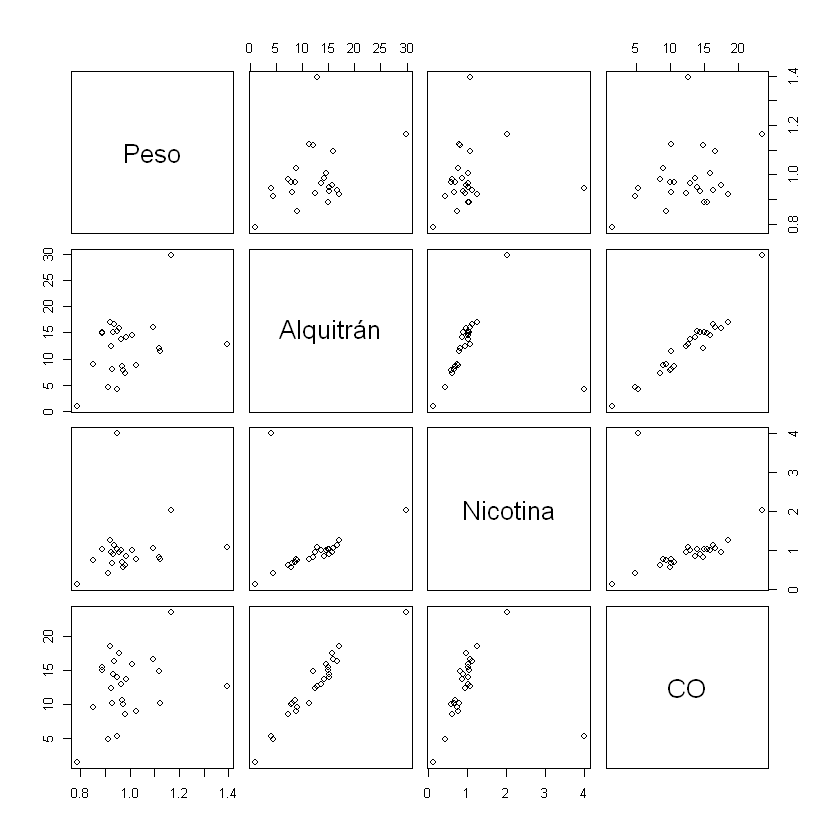

In [2]:
library(ggplot2,ggm)
pairs(df[3:6])

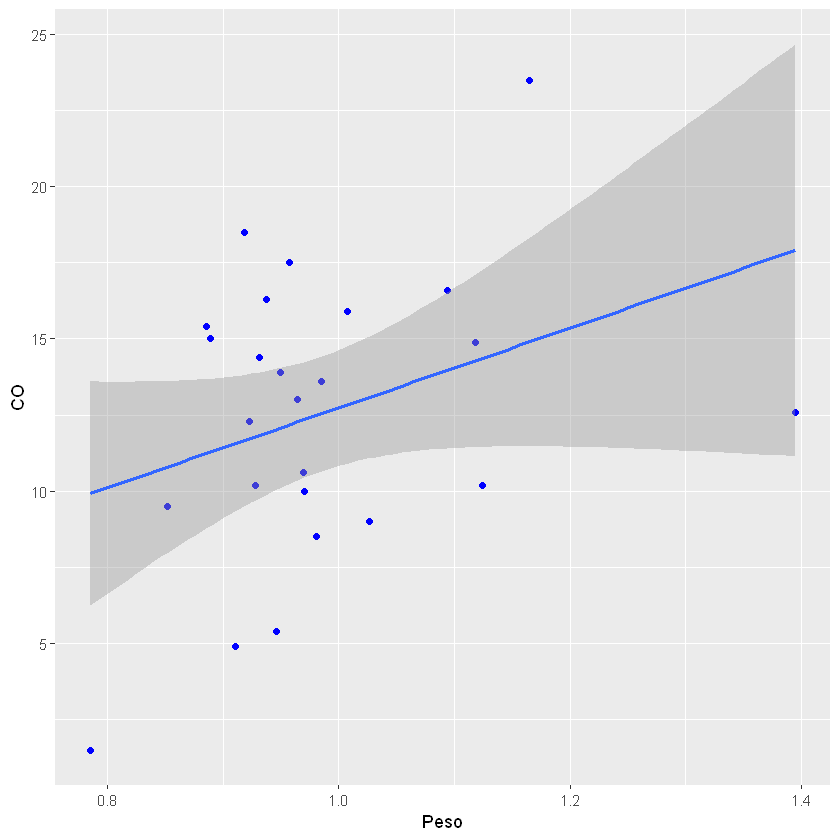

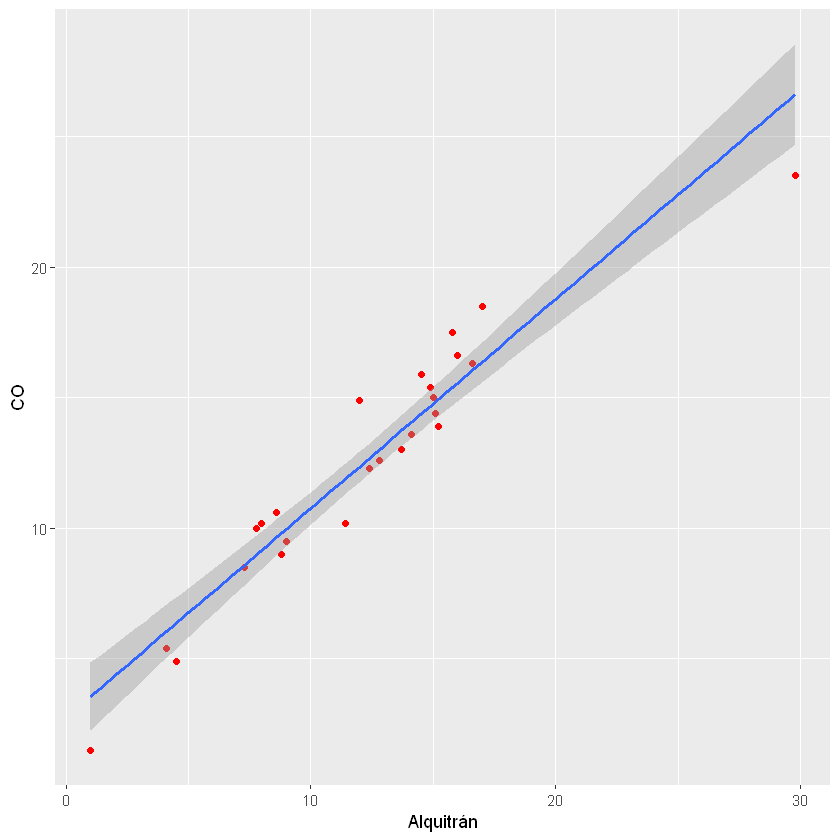

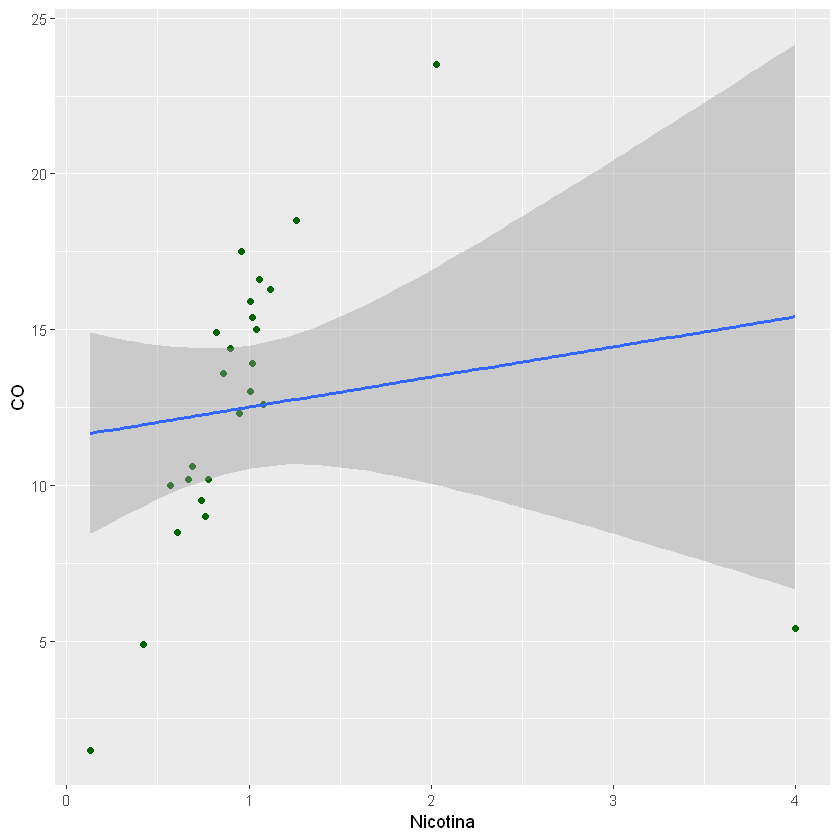

In [3]:
ggplot(df,aes(y =CO ,x = Peso)) + geom_point(color = "blue") +geom_smooth(method = "lm")
ggplot(df,aes(y =CO ,x = Alquitrán)) + geom_point(color = "red") +geom_smooth(method = "lm")
ggplot(df,aes(y =CO ,x = Nicotina)) + geom_point(color = "dark green")+geom_smooth(method = "lm")

### Coeficientes de correlación simples

En general, se reportan correlaciones lineales positivas entre todas las variables. La variables que más fuertemente esta correlacionada con CO es __Alquitrán__, seguida de __Peso__ y al último con __Nicotina__, con valores muy por debajo comparado con los de la primera. 

Las correlaciones existentes entre las variables independientes no son tan grandes, lo cual da buen indicio para la independencia requerida para el modelo de regresión. 

In [4]:
cor(df[3:6])

,Peso,Alquitrán,Nicotina,CO
Peso,1.0000000,0.3664147,0.1487285,0.3363859
Alquitrán,0.3664147,1.0000000,0.1849775,0.9574853
Nicotina,0.1487285,0.1849775,1.0000000,0.1444891
CO,0.3363859,0.9574853,0.1444891,1.0000000


### Coeficientes de correlación Parciales

Este coeficiente describe la relación entre dos variables cuando se elimina la infuencia de las demmás. En otras palabras, se calulan que tanta varianza explica cada una de las variables independientes con la condición de que se elimina la proporción que pudiera llegar a ser explicada por las demás variables. La correlación parcial __siempre es menor__ que la correlación simple.

- Se observa que la varianza explicada de __Alquitrán__ sobre CO es casí del 100%. 
- Tanto __Peso__ como __Nicotina__ explican muy poca de la varianza de CO por si solas.  

In [5]:
ggm:: pcor(c("CO","Peso","Alquitrán","Nicotina"),var(df[3:6]))

[1] -0.0441144

In [6]:
ggm:: pcor(c("CO","Alquitrán","Nicotina","Peso"),var(df[3:6]))

[1] 0.9521669

In [7]:
ggm:: pcor(c("CO","Nicotina","Alquitrán","Peso"),var(df[3:6]))

[1] -0.1109046

## Modelo de regresión lineal múltiple

In [8]:
modelo = lm(`CO`~`Peso`+`Alquitrán`+`Nicotina`)

### Coeficientes de la regresión

- Intersección: Normalmente este coeficiente no tienen una interpretación necesariamente lógica. El modelo muestra que en ausencia de Peso, Alquitrán y Nicotina, el CO es de 3.3767 unidades.
- Peso: Si __Alquitrán__ y __Nicotina__ se mantienen constantes, por cada unidad de Peso que incremente, el nivel de CO __disminuirá__ en .5314 unidades.
- Alquitrán: //                           //                 //, por cada unidad de Alquitrán que incremente, el nivel de CO __aumentará__ .8102 unidades.
- Nicotina: //                            //                 //, por cada unidad de Nicotina que incremente, el nivel de CO __disminuirá__ .2185 unidades.

In [9]:
coefficients(modelo)

(Intercept)        Peso   Alquitrán    Nicotina 
  3.3767170  -0.5314053   0.8102072  -0.2185786

### Residuales

Como era de esperarse, los residuales siguen una distribución normal con un grado de confiabilidad del 95%.

- Los residuales pasan la prueba Shapiro-Wilk, es decir, no se rechaza la hipótesis nula sobre que los residuales siguen una distribución normal. El P-value de demasiada evidencia estadística con un valor de .9752.

- Graficacmente también se logra visualizar una ligera campana.

In [29]:
sd(residuals(modelo))

[1] 1.356908

In [10]:
shapiro.test(residuals(modelo))


	Shapiro-Wilk normality test

data:  residuals(modelo)
W = 0.98622, p-value = 0.9752


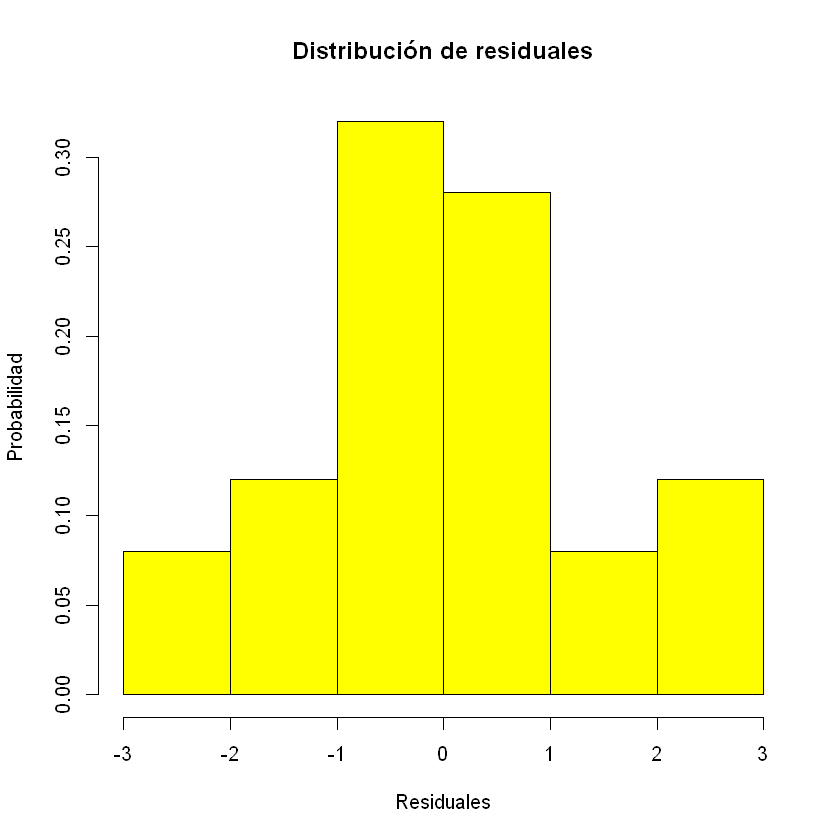

In [11]:
hist(residuals(modelo),col = "yellow",main = "Distribución de residuales", xlab = "Residuales", probability = T, ylab = "Probabilidad")

### ANOVA

El primer resultado (función de R) muestra una tabla ANOVA diferente de la que se mostró en clase. La segunda tabla (la mostrada en clase) puede ser obtenida directamente desde la primer:

- Se suman los grados de libertad de las variables independientes.
- Se suman las Sum Sq de cada variable independiente.
- Notar que Mean Sq es igual a Sum Sq, esto es porque al hacer el cociente entre Sum Sq y Df nos da la misma cantidad. 
- Se calcular los valores F por separado para después calcular su P-Valor.

En conclusión, la ANOVA __rechaza la hipótesis nula__, es decir, podemos asegurar con un 95% de confianza que al menos uno de los parámetros de la regresión son distintos a 0; en otras palabras, la regresión tiene sentido.

In [12]:
anova(modelo)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Peso,1,61.0078178,61.0078178,28.9929880,2.431733e-05
Alquitrán,1,433.4035402,433.4035402,205.9680889,2.514841e-12
Nicotina,1,0.5502825,0.5502825,0.2615129,6.144178e-01
Residuals,21,44.1887595,2.1042266,NA,NA


In [13]:
data.frame("Df" = c(3,21,24),"Sum Sq" = c(494.9616405,44.1887595,539.1504),"Mean Sq" = c(164.9872135,2.104226643,NA), "F value" = c(78.40752994,NA,NA), "Pr(>F)" = c(1.42565e-11,NA,NA))

Df,Sum.Sq,Mean.Sq,F.value,Pr..F.
3,494.96164,164.987213,78.40753,1.42565e-11
21,44.18876,2.104227,NA,NA
24,539.15040,NA,NA,NA


### Resumen (T-test/$R^2$ ajustada)

__T-TEST__:

- Tanto el intercepto (sin importancia para el modelo) como las variables __Peso__ y __Nicotina__ presentan un P-value mayor a .05. Esto significa que para estos 3 casos, hay sufiente evidencia estadística para __no rechazar la hipótesis nula__. Es decir, con un 95% de confianza podemos afirmar que estos coeficientes son igual a cero. Más aún, __Peso__ y __Nicotina__ no aportan valor al modelo.

- La variable __Alquitran__ presenta un P-Value menor que .05, lo que quiere decir que existe evidencia estadística para __rechazar la hipótesis nula__. Así, se concluye que esta variable es la única que aporta valor al modelo. 

__$R^2$ AJUSTADA__:

- La $R^2$ ajustada del modelo es .9063. Esto es, el modelo logra describir el 90% de la varianza total de Y.

In [14]:
summary(modelo)


Call:
lm(formula = CO ~ Peso + Alquitrán + Nicotina)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9581 -0.7434 -0.1368  0.9440  2.5743 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.37672    2.42980   1.390    0.179    
Peso        -0.53141    2.62611  -0.202    0.842    
Alquitrán    0.81021    0.05674  14.279 2.77e-12 ***
Nicotina    -0.21858    0.42743  -0.511    0.614    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.451 on 21 degrees of freedom
Multiple R-squared:  0.918,	Adjusted R-squared:  0.9063 
F-statistic: 78.41 on 3 and 21 DF,  p-value: 1.426e-11


### Predicción

Utilizando el modelo construido, en caso de que se presente un Peso de 1.1, Alquitrán de 18 y Nicotina de 3, el modelo predice que el CO tendrá un valor de 16.72.

In [15]:
new = data.frame(Peso = c(1.1), Alquitrán = c(18), Nicotina = c(3))
predict(modelo,newdata = new)

1 
16.72017

## Intervalos de confianza

Notar que los intervalos de confianza para Y puntuales son más grandes que los medios.

In [16]:
independientes = df[3:5]

### Intervalo de confianza para valores medios de Y 

In [17]:
IC_MEDIOS<-predict(modelo,newdata=independientes,interval="confidence",level=0.95)
IC_MEDIOS

fit,lwr,upr
14.089067,13.424080,14.754055
15.527088,14.674537,16.379639
26.458090,24.376031,28.540149
9.218783,8.421473,10.016092
5.321437,2.318556,8.324317
14.830350,13.899083,15.761617
9.794827,8.969635,10.620018
12.725415,12.029120,13.421711
16.083316,15.194231,16.972400
14.755135,13.820273,15.689997


### Intervalos de confianza para valores puntuales de Y

In [18]:
IC_PUNTUALES<-predict(modelo,newdata=independientes,interval="prediction",level=0.95)
IC_PUNTUALES

fit,lwr,upr
14.089067,10.9999649,17.178170
15.527088,12.3922531,18.661923
26.458090,22.7926684,30.123512
9.218783,6.0985187,12.339047
5.321437,1.0649546,9.577918
14.830350,11.6731985,17.987501
9.794827,6.6673219,12.922332
12.725415,9.6294222,15.821408
16.083316,12.9383487,19.228283
14.755135,11.5969218,17.913349


## Análisis de Residuales para identificar Puntos palanca o Puntos Atípicos.

### Distancia de Cook

La distancia de Cook (D) mide el efecto que tiene una observación sobre el conjunto de coeficientes en un modelo lineal. De esta manera, se puede constatar que el registro 5 es un valor atípico por la gran influencia que este tienen en el modelo. De igual forma, registros como el 3 y el 16 influyen más que los demás pero en menor medida.

In [19]:
cook = data.frame(index = 1:25,cooks.distance(modelo))
numero_parametros = 3
numero_registros = 25
leverage = numero_parametros/numero_registros *2
cook["mayor_leverage"] = cook["cooks.distance.modelo."] > leverage
cook

index,cooks.distance.modelo.,mayor_leverage
1,0.0015255296,FALSE
2,0.0129020919,FALSE
3,1.8060093728,TRUE
4,0.0092357484,FALSE
5,8.7237215672,TRUE
6,0.0003981413,FALSE
7,0.0065614117,FALSE
8,0.0012780739,FALSE
9,0.0005811089,FALSE
10,0.0058065759,FALSE


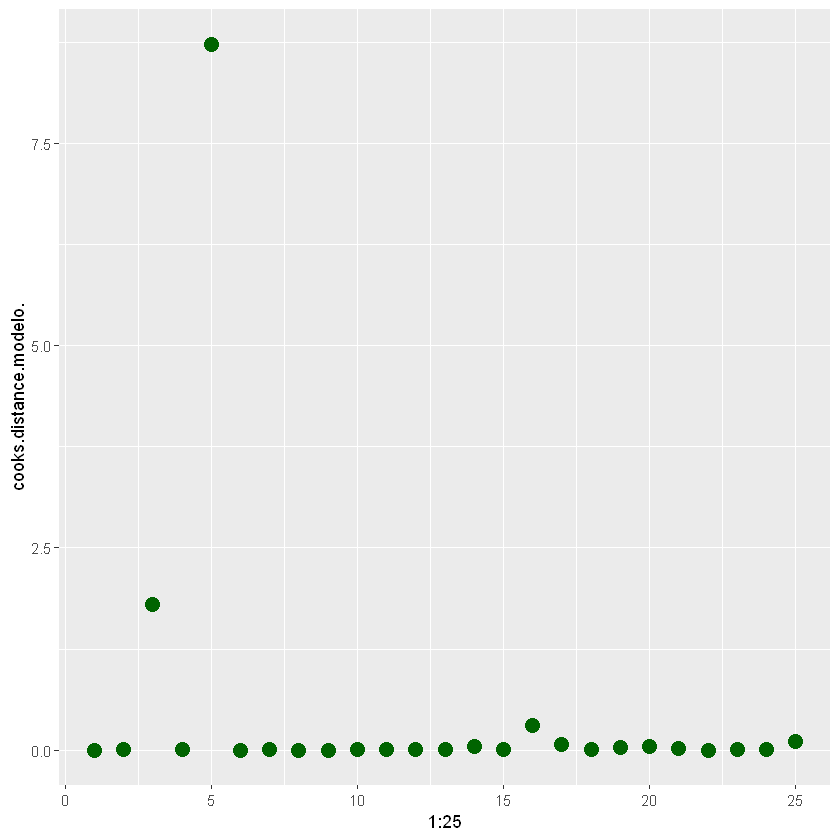

In [20]:
ggplot(cook,aes(x = 1:25,y = cooks.distance.modelo.)) + geom_point(color = "dark green", size = 4)

### Distancia de Mahalanobis

Se confirma que el registro 5 presenta mucho efecto sobre el modelo, al igual que el 3. Ahora el registro 18 presento con está métrica mayor efecto que el registro 16. 

In [21]:
mahalanobis = data.frame(index = 1:25,hat = hatvalues(modelo))
chi = qchisq(p = .99,2)
mahalanobis["mahalanobis"] = (25-1)*(mahalanobis["hat"] - 1/25)
mahalanobis["mayor_chi"] = mahalanobis["mahalanobis"] > chi
mahalanobis

index,hat,mahalanobis,mayor_chi
1,0.04859246,0.2062191,FALSE
2,0.07986985,0.9568764,FALSE
3,0.47635223,10.4724536,TRUE
4,0.06985474,0.7165138,FALSE
5,0.99087353,22.8209648,TRUE
6,0.09529948,1.3271875,FALSE
7,0.07482586,0.8358206,FALSE
8,0.05327571,0.3186171,FALSE
9,0.08686161,1.1246787,FALSE
10,0.09603669,1.3448805,FALSE


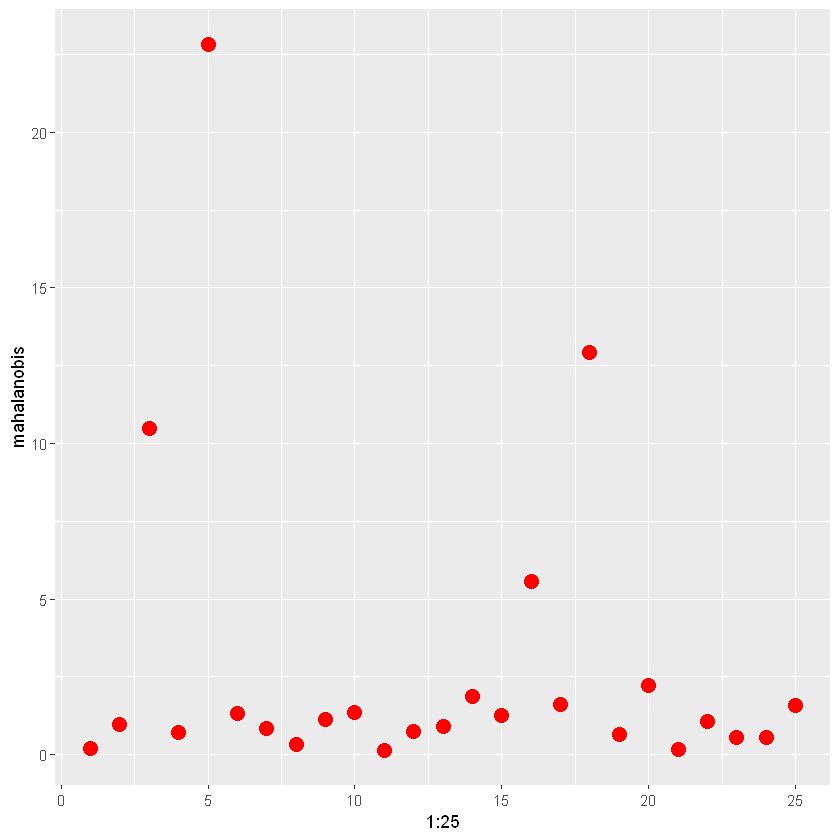

In [22]:
ggplot(mahalanobis,aes(x = 1:25,y = mahalanobis)) + geom_point(color = "red", size = 4)

### DeltaFit

Permite valorar el cambio en la estimación de la variable dependiente Y correspondiente a la observación si la observación es eliminada del cálculo. Así, se observa que hay dos puntos que influyen mucho sobre el modelo.

In [23]:
fit = data.frame(residuos = residuals(modelo),hat = hatvalues(modelo))
fit["deltafit"] = (fit["residuos"]* fit["hat"])/(1-fit["hat"])
fit
max(fit["deltafit"])
min(fit["deltafit"])

residuos,hat,deltafit
-0.48906739,0.04859246,-0.02497877
1.07291210,0.07986985,0.09313175
-2.95809014,0.47635223,-2.69091734
0.98121715,0.06985474,0.07369029
0.07856347,0.99087353,8.52974927
0.16965023,0.09529948,0.01787064
-0.79482685,0.07482586,-0.06428368
-0.42541531,0.05327571,-0.02393971
0.21668441,0.08686161,0.02061194
0.64486458,0.09603669,0.06851015


[1] 8.529749

[1] -2.690917

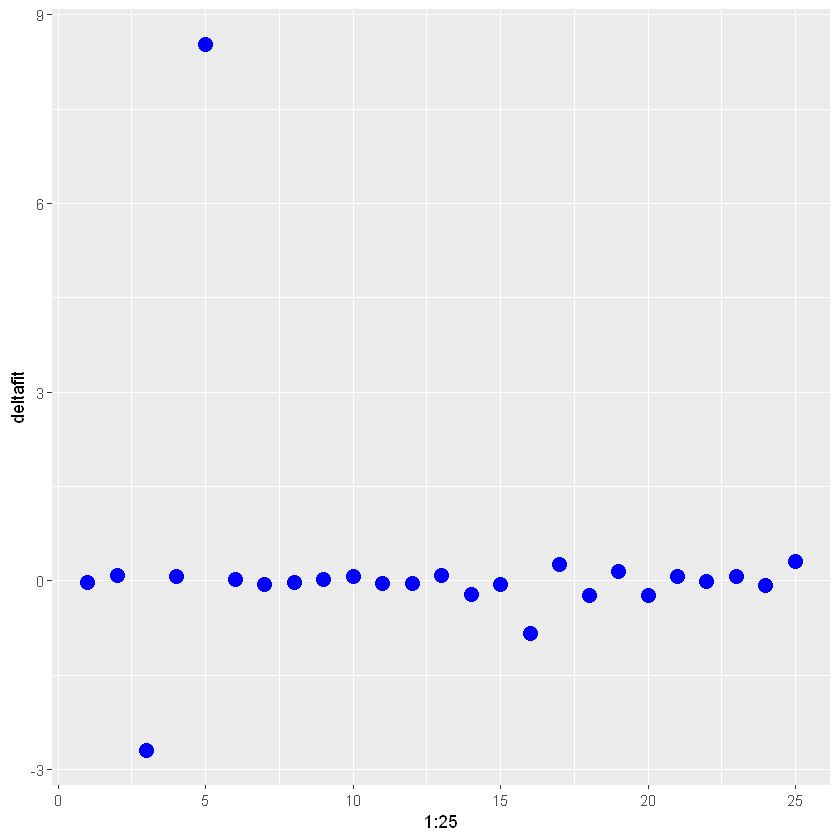

In [24]:
ggplot(fit,aes(x = 1:25,y = deltafit)) + geom_point(color = "blue", size = 4)

## Modelo solo tomando en cuenta la variable alquitrán

Retirando las variables __Peso__ y __Nicotina__ se alcanza un mejor ajuste comparando las $R^2$ de ambos modelos.

In [25]:
modelo2 = lm(`CO`~`Alquitrán`)

In [26]:
summary(modelo2)


Call:
lm(formula = CO ~ Alquitrán)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1124 -0.7167 -0.3754  1.0091  2.5450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.74328    0.67521   4.063 0.000481 ***
Alquitrán    0.80098    0.05032  15.918 6.55e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.397 on 23 degrees of freedom
Multiple R-squared:  0.9168,	Adjusted R-squared:  0.9132 
F-statistic: 253.4 on 1 and 23 DF,  p-value: 6.552e-14


In [30]:
residuals(modelo2)

1           2           3           4           5           6 
-0.43703873  1.04110693 -3.11236145  1.04891469 -0.62727903  0.24208290 
          7           8           9          10          11          12 
-0.79186609 -0.37537958  0.26052135  0.72218050 -0.71664834 -0.43801470 
         13          14          15          16          17          18 
 1.00910988 -1.67440361 -0.45206128 -2.04425352  2.14013096 -0.39576997 
         19          20          21          22          23          24 
 2.10130212 -1.44766942  1.54257088 -0.09040213  0.96832911 -1.01811229 
         25 
 2.54501081